In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read train and test data

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


### train data information

In [4]:
# train info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# get a list of qulitative features
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

In [6]:
# get a list of quantative columns 
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
# these columns have the output (Sale Price) and Id, we need only the input features (Id is not useful)
quantitative.remove('SalePrice')
quantitative.remove ('Id')

In [7]:
# qualitative describtion
train[qualitative].describe().T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [8]:
# quantitative describtion
train[quantitative].describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


## nulls

<AxesSubplot:>

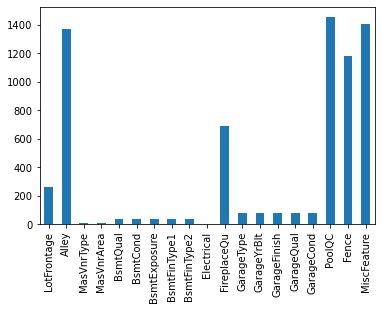

In [9]:
# count the number of missing values in each column and ploting them
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.plot.bar()

## Correlation

In [10]:
quantitative_data = train[quantitative+['SalePrice']]
corr_matrix = quantitative_data.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

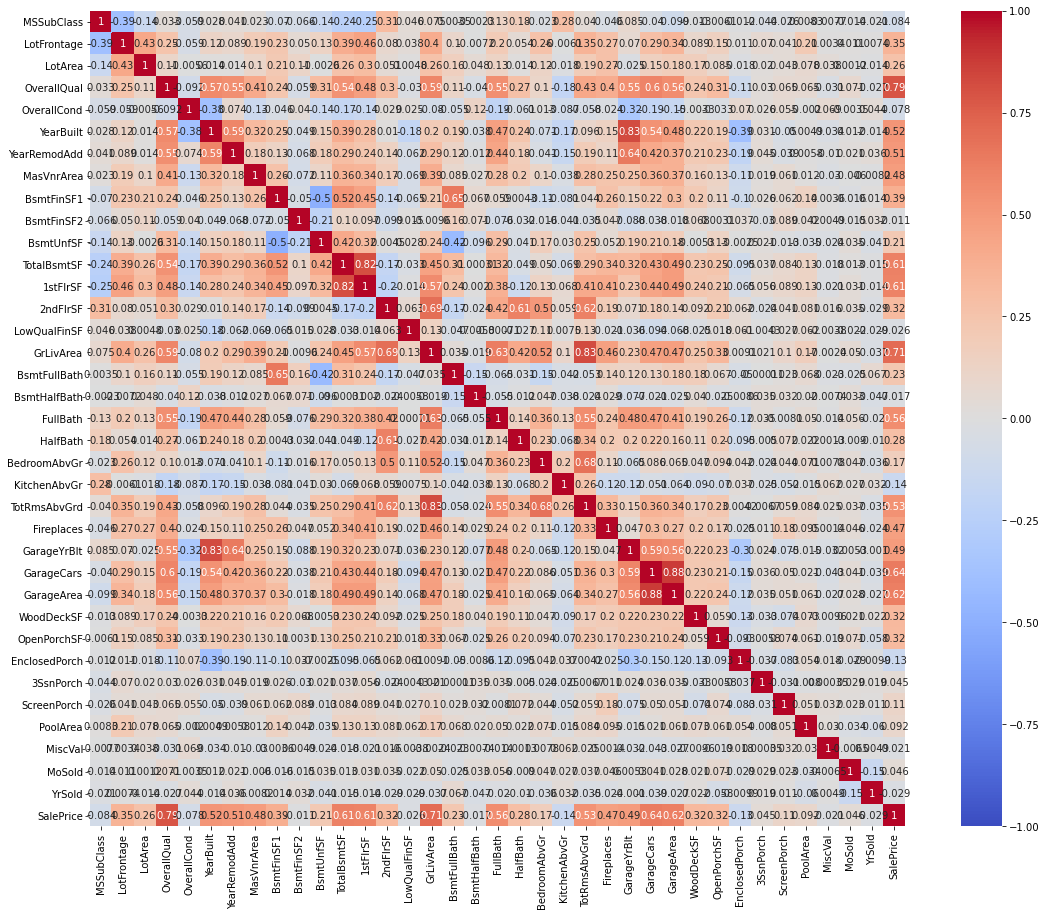

In [11]:
#Visualize correlation
plt.subplots(figsize=(20,15))
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

## Data exploration

In [12]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\Esraa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

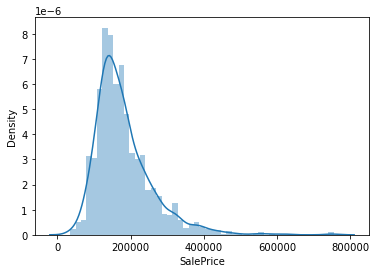

In [13]:
sns.distplot(train['SalePrice'])

C:\Users\Esraa\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


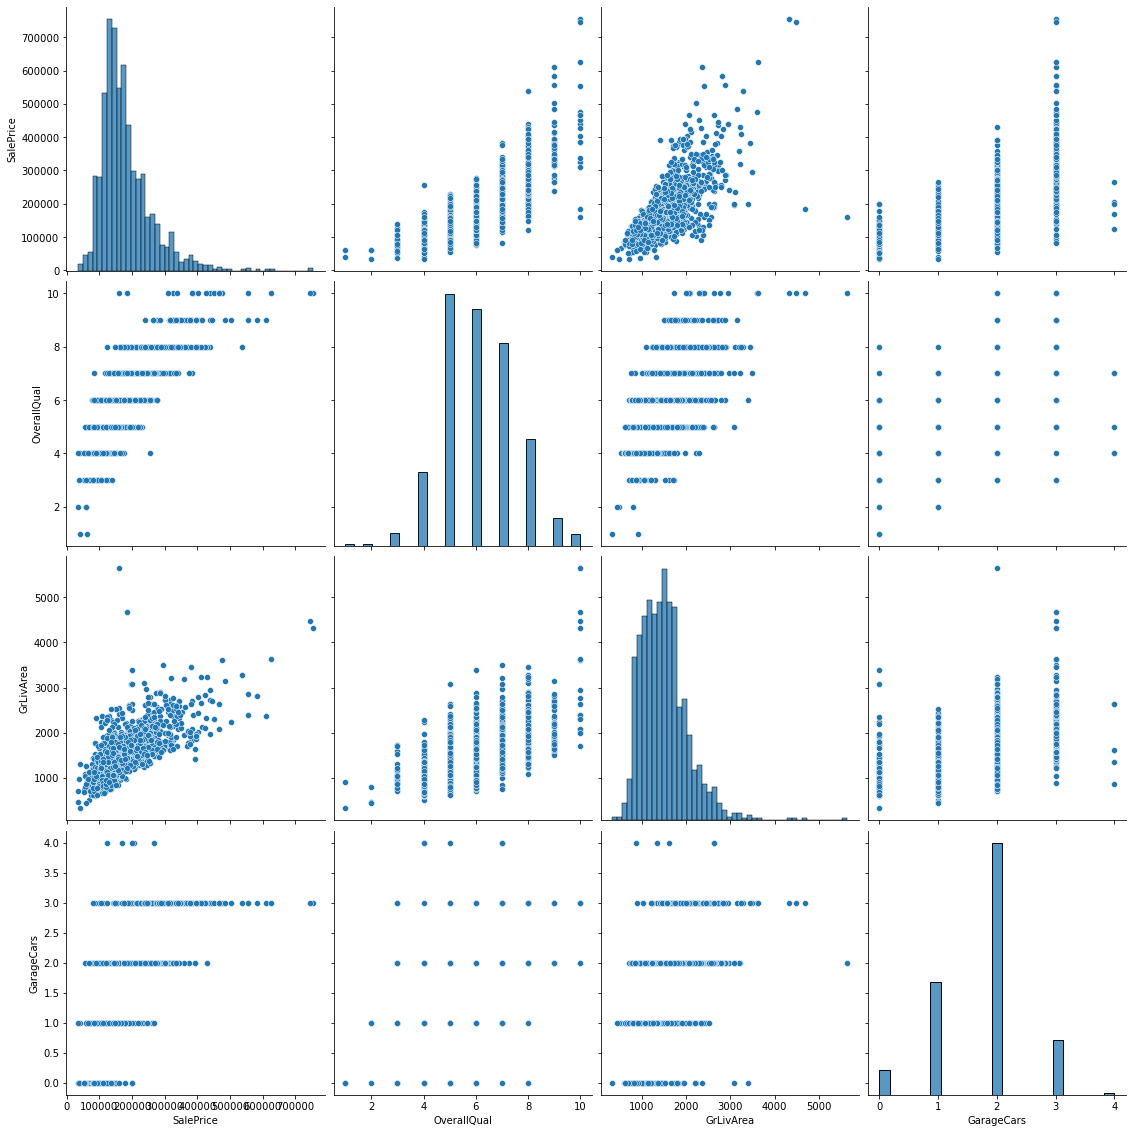

In [14]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']
sns.pairplot(train[cols], size = 4)

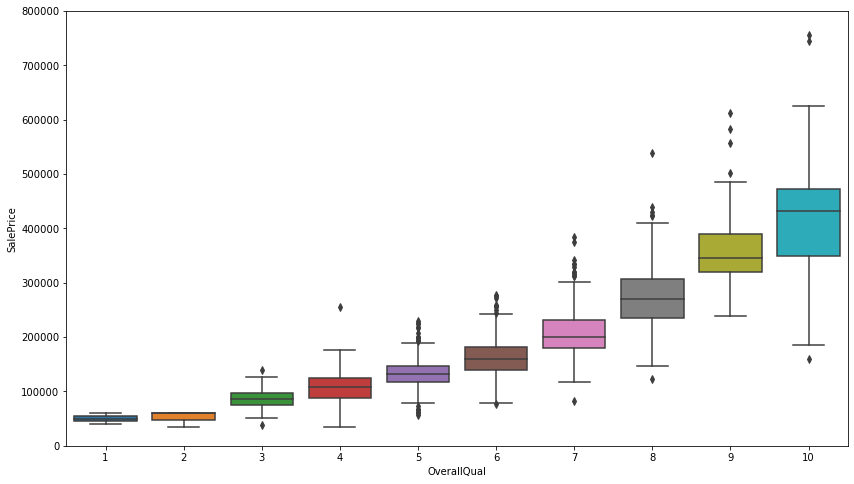

In [15]:
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

## encoding of qualitative features

In [16]:
### one hot encoding of qualitative columns which uniqe values < 14 
x=train.drop(['Exterior2nd','Exterior1st','Neighborhood'],axis =1) 
qualitative = [f for f in x.columns if x.dtypes[f] == 'object']
train = pd.get_dummies(train, columns =qualitative ,drop_first=True)
### factorization of qualitative columns which uniqe values > 14 
train['Neighborhood'], Categorical= pd.factorize(train['Neighborhood'])
train['Exterior1st'], Categorical= pd.factorize(train['Exterior1st'])
train['Exterior2nd'], Categorical= pd.factorize(train['Exterior2nd'])

## dealing with missing value

In [17]:
### drop of 'GarageYrBlt'which has nulls as not has large effect on model
train = train.drop(['GarageYrBlt'],axis =1) 

In [18]:
### drop of filling null values in column with specific values
train['LotFrontage'] = train['LotFrontage'].fillna(0)
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

## feature selection

In [19]:
### features with high Correlation values 
X = train[['OverallQual', 'GrLivArea', 'GarageCars']]
### target
y = train [['SalePrice']]


## split

In [20]:
### spliting
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2, random_state=42)

 ## apply model & PolynomialFeatures

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.fit_transform(X_val)
poly_model = LinearRegression()
poly_model.fit(X_train_poly , y_train)

LinearRegression()

## prediction & r2 score for validation

In [22]:
from sklearn.metrics import  r2_score
y_pred=poly_model.predict(X_val_poly)
print( r2_score(y_val, y_pred))

0.8384768971426835


## test

In [25]:
X_test = test[['OverallQual', 'GrLivArea', 'GarageCars']]
X_test['GarageCars'] = X_test['GarageCars'].fillna(X_test['GarageCars'].mean())


<ipython-input-25-ecf1be602b6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageCars'] = X_test['GarageCars'].fillna(X_test['GarageCars'].mean())


In [26]:
X_test_poly = poly_features.fit_transform(X_test)

In [27]:
y_pred_test=poly_model.predict(X_test_poly)

In [28]:
test['SalePrice'] = y_pred_test

In [29]:
test[['Id', 'SalePrice']].to_csv('submission1.csv', index=False)